In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn.model_selection import LeaveOneOut
import matplotlib
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


## Wine data

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.1)

c=1 -> train_accuracy: 0.8875
c=1 -> valid_accuracy: 1.0
c=1 -> test_accuracy: 0.9444444444444444
c=100 -> train_accuracy: 0.8875
c=100 -> valid_accuracy: 1.0
c=100 -> test_accuracy: 0.9444444444444444


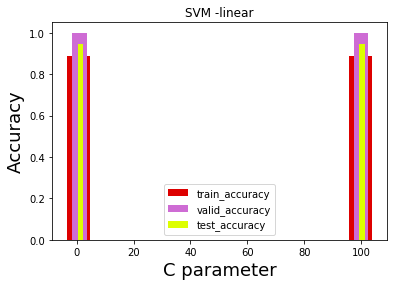

In [11]:
x_train1,x_valid,y_train1,y_valid=train_test_split(x_train,y_train,test_size=0.1)
x=[1,100]
# 1
wine_model=SVC(kernel='linear',C=1)
wine_model.fit(x_train,y_train)
wine_model.fit(x_valid,y_valid)
prediction=wine_model.predict(x_test)

train_accuracy=wine_model.score(x_train,y_train)
valid_accuracy=wine_model.score(x_valid,y_valid)
test_accuracy=wine_model.score(x_test,y_test)
plt.bar(x[0]-0.3,train_accuracy,width=8,color='#dd0000')
plt.bar(x[0],valid_accuracy,width=5,color='#ce6cd4')
plt.bar(x[0]+0.3,test_accuracy,width=2,color='#ddff00')

print("c=1 -> train_accuracy:",train_accuracy)
print("c=1 -> valid_accuracy:",valid_accuracy)
print("c=1 -> test_accuracy:",test_accuracy)


# 100
wine_model=SVC(kernel='linear',C=100)
wine_model.fit(x_train,y_train)
wine_model.fit(x_valid,y_valid)
prediction=wine_model.predict(x_test)

train_accuracy=wine_model.score(x_train,y_train)
valid_accuracy=wine_model.score(x_valid,y_valid)
test_accuracy=wine_model.score(x_test,y_test)
plt.bar(x[1]-0.3,train_accuracy,width=8,color='#dd0000')
plt.bar(x[1],valid_accuracy,width=5,color='#ce6cd4')
plt.bar(x[1]+0.3,test_accuracy,width=2,color='#ddff00')
print("c=100 -> train_accuracy:",train_accuracy)
print("c=100 -> valid_accuracy:",valid_accuracy)
print("c=100 -> test_accuracy:",test_accuracy)


plt.title('SVM -linear')
plt.legend(['train_accuracy','valid_accuracy','test_accuracy'],)
plt.xlabel('C parameter',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.show()


c =1 --> test_accuracy: 1.0
c =1 --> kfold.mean :  0.9171428571428573
c =1 --> loo.mean :  0.9375
c =100 --> test_accuracy: 1.0
c =100 --> kfold.mean :  0.9171428571428573
c =100 --> loo.mean :  0.9444444444444444


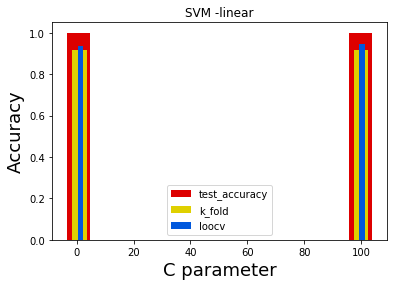

In [12]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.1)
x=[1,100]
# c=1
wine_model=SVC(kernel='linear',C=1)
wine_model.fit(x_train,y_train)
prediction=wine_model.predict(x_test)


test_accuracy=wine_model.score(x_test,y_test)
score_kfold=cross_val_score(wine_model,x_train,y_train,cv=10)
loo=LeaveOneOut()
score_loo=cross_val_score(wine_model,x_train,y_train,cv=loo)

plt.bar(x[0]-0.3,test_accuracy,width=8,color='#dd0000')
plt.bar(x[0],score_kfold.mean(),width=5,color='#dfd000')
plt.bar(x[0]+0.3,score_loo.mean(),width=2,color='#0058dd')
print("c =1 --> test_accuracy:",test_accuracy)
print("c =1 --> kfold.mean : ",score_kfold.mean())
print("c =1 --> loo.mean : ",score_loo.mean())


# c=100
wine_model=SVC(kernel='linear',C=100)
wine_model.fit(x_train,y_train)
prediction=wine_model.predict(x_test)


test_accuracy=wine_model.score(x_test,y_test)
score_kfold=cross_val_score(wine_model,x_train,y_train,cv=10)
loo=LeaveOneOut()
score_loo=cross_val_score(wine_model,x_train,y_train,cv=loo)

plt.bar(x[1]-0.3,test_accuracy,width=8,color='#dd0000')
plt.bar(x[1],score_kfold.mean(),width=5,color='#dfd000')
plt.bar(x[1]+0.3,score_loo.mean(),width=2,color='#0058dd')

print("c =100 --> test_accuracy:",test_accuracy)
print("c =100 --> kfold.mean : ",score_kfold.mean())
print("c =100 --> loo.mean : ",score_loo.mean())

plt.title('SVM -linear')
plt.legend(['test_accuracy','k_fold','loocv'],)
plt.xlabel('C parameter',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.show()
